# TODO: Task 2 - Approximating linear vector fields

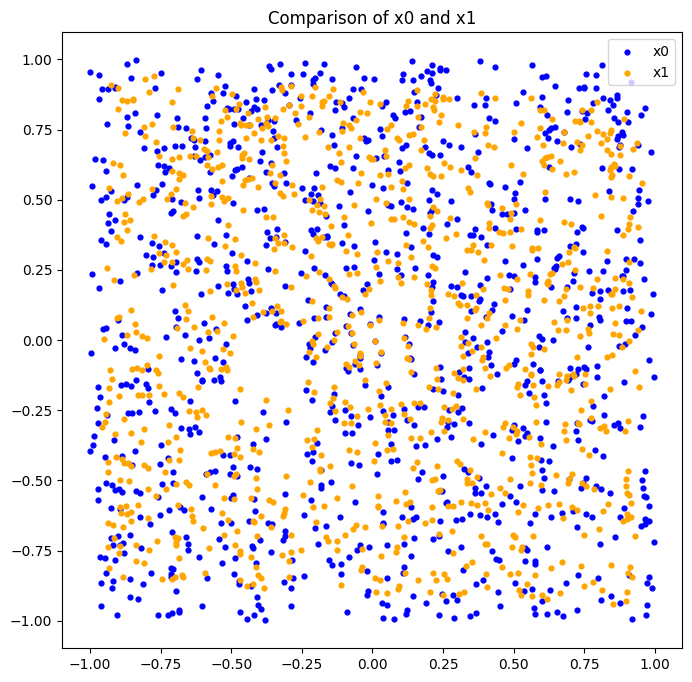

In [17]:
# All imports (TODO: Remove the ones that you don't use and add appropriate packages if necessary)
import numpy as np

import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from utils import *

# Load data
x0 = np.loadtxt('../../data/linear_vectorfield_data_x0.txt')
x1 = np.loadtxt('../../data/linear_vectorfield_data_x1.txt')

plt.figure(figsize=(8, 8))
plt.scatter(x0[:, 0], x0[:, 1], color='blue', alpha=1, label='x0', s=12)
plt.scatter(x1[:, 0], x1[:, 1], color='orange', alpha=1, label='x1', s=12)

plt.legend()
plt.title('Comparison of x0 and x1')
plt.show()

### TODO: Part 1 - Estimate the linear vector field that was used to generate the points $x_1$ from the points $x_0$

In [8]:
dt = 0.1
v_k = (x1-x0)/dt
A,_,_,_ = least_squares(x0,v_k,cond=1e-5)
print(A)

[[-0.49355245 -0.4638232 ]
 [ 0.23191153 -0.95737573]]


### TODO: Part 2 - Solve the linear system and compute the mean squared error 

In [3]:
t_span = (0, 0.1)
t_eval = np.linspace(t_span[0], t_span[1], 2)

x_pred = np.zeros_like(x0)
for i in range(len(x0)):
    sol = solve_ivp(system, t_span, x0[i], t_eval=t_eval, args=(A,))
    x_pred[i] = sol.y[:, -1]

mse = np.mean(np.sum((x_pred - x1) ** 2, axis=1))
print(f"Mean squared error = {mse}")

Mean squared error = 0.0030599275959897355


###  TODO: Part 3 - Visualize trajectories and phase portrait 

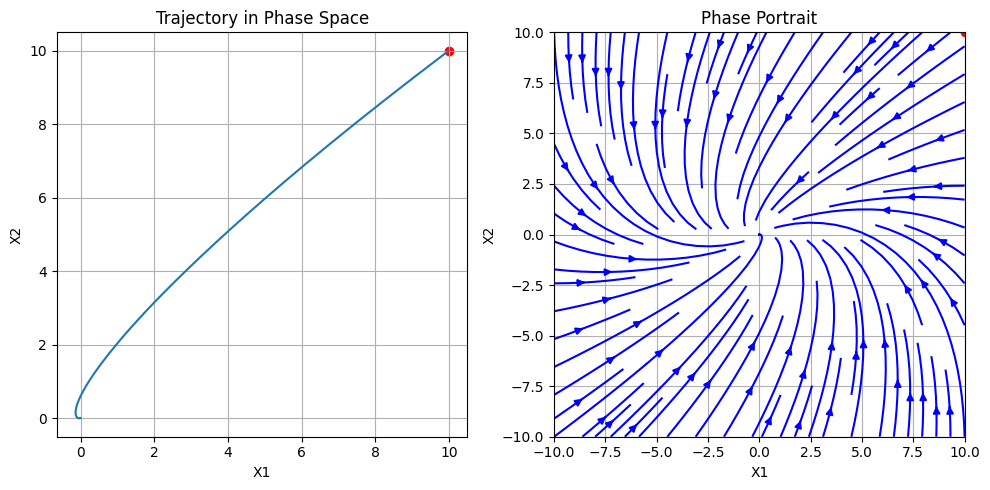

In [4]:
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

x_init = np.array([10,10], dtype = np.float32)
sol = solve_ivp(system, t_span, x_init, t_eval=t_eval, args=(A,))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(sol.y[0], sol.y[1], label='Trajectory')
plt.scatter([x_init[0]], [x_init[1]], color='red')
plt.title('Trajectory in Phase Space')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)

X, Y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
U, V = vector_field(X, Y, A)

plt.subplot(1, 2, 2)
plt.streamplot(X, Y, U, V, color='blue')
plt.scatter([x_init[0]], [x_init[1]], color='red')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title('Phase Portrait')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)

plt.tight_layout()
plt.show()